In [4]:
# import sys
# !{sys.executable} -m pip install numpy matplotlib
import numpy as np
import matplotlib.pyplot as plt
import csv
import sys
print(sys.executable)

/usr/bin/python3


In [5]:
with open('movies.csv', 'r') as csvfile:
    moviereader = [x for x in csv.reader(csvfile, delimiter=',')]
    
    header_dict = dict()
    
    for i in range(len(moviereader[0])):
        header_dict[moviereader[0][i]] = i
        
    print(header_dict)
    
#     for row in moviereader:
#         print(row)

{'year': 0, 'imdb': 1, 'title': 2, 'test': 3, 'clean_test': 4, 'binary': 5, 'budget': 6, 'domgross': 7, 'intgross': 8, 'code': 9, 'budget_2013$': 10, 'domgross_2013$': 11, 'intgross_2013$': 12, 'period code': 13, 'decade code': 14}


test


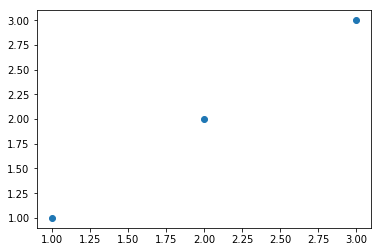

In [7]:
print("test")

plt.plot([1,2,3], [1,2,3], 'o')
plt.show()

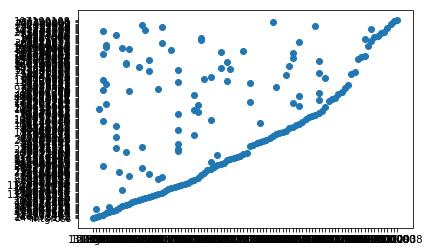

In [12]:
#Budget vs international gross

x = [x[6] for x in moviereader][::10]
y = [x[8] for x in moviereader][::10]

plt.plot(x, y, 'o')
plt.show()

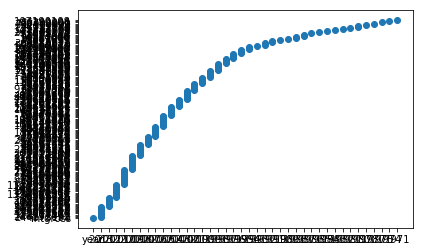

In [14]:
#Budget vs international gross

x = [x[0] for x in moviereader][::10]
y = [x[8] for x in moviereader][::10]

plt.plot(x, y, 'o')
plt.show()